# TFM: Predicción en la Laguna de fuente de Piedra

### Autor: Miguel Ángel Pérez García.

#### Máster en Ciencia de Datos

#### Tutor: Carlos Luis Sanchez Bocanegra

### Bibliotecas

In [2]:
from sklearn.impute import KNNImputer
import pandas as pd
from datetime import datetime
import dateparser
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from pyearth import Earth
from sklearn.neighbors import KNeighborsRegressor
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

#  1. Integración de datos

In [ ]:
url_2009 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2008-09.csv"
url_2010 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2009-10.csv"
url_2011 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2010-11.csv"
url_2012 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2011-12.csv"
url_2013 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2012-13.csv"
url_2014 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2013-14.csv"
url_2015 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2014-15.csv"
url_2016 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2015-16.csv"
url_2017 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2016-17.csv"
url_2018 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2017-18.csv"
url_2019 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2018-19.csv"
url_2020 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2019-20.csv"
url_2021 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2020-21.csv"
url_2022 = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/csv/PRECIPITACIONES 2021-22.csv"

url_2009_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2008-09.csv"
url_2010_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2009-10.csv"
url_2011_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2010-11.csv"
url_2012_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2011-12.csv"
url_2013_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2012-13.csv"
url_2014_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2013-14.csv"
url_2015_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2014-15.csv"
url_2016_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2015-16.csv"
url_2017_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2016-17.csv"
url_2018_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2017-18.csv"
url_2019_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2018-19.csv"
url_2020_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2019-20.csv"
url_2021_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2020-21.csv"
url_2022_temp_max = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp max 2021-22.csv"

url_2009_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2008-09.csv"
url_2010_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2009-10.csv"
url_2011_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2010-11.csv"
url_2012_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2011-12.csv"
url_2013_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2012-13.csv"
url_2014_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2013-14.csv"
url_2015_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2014-15.csv"
url_2016_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2015-16.csv"
url_2017_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2016-17.csv"
url_2018_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2017-18.csv"
url_2019_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2018-19.csv"
url_2020_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2019-20.csv"
url_2021_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2020-21.csv"
url_2022_temp_min = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/csv/temp min 2021-22.csv"

url_2009_heliografo = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/csv/heliografo 2009.csv"
url_2010_heliografo = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/csv/heliografo 2010.csv"
url_2011_heliografo = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/csv/heliografo 2011.csv"
url_2012_heliografo = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/csv/heliografo 2012.csv"
url_2013_heliografo = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/csv/heliografo 2013.csv"
url_2014_heliografo = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/csv/heliografo 2014.csv"
url_2015_heliografo = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/csv/heliografo 2015.csv"
url_2016_heliografo = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/csv/heliografo 2016.csv"
url_2017_heliografo = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/csv/heliografo 2017.csv"
url_2018_heliografo = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/csv/heliografo 2018.csv"
url_2019_heliografo = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/csv/heliografo 2019.csv"
url_2020_heliografo = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/csv/heliografo 2020.csv"
url_2021_heliografo = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/csv/heliografo 2021.csv"

url_2009_tanque = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/csv/Tanque 2009.csv"
url_2010_tanque = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/csv/Tanque 2010.csv"
url_2011_tanque = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/csv/Tanque 2011.csv"
url_2012_tanque = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/csv/Tanque 2012.csv"
url_2013_tanque = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/csv/Tanque 2013.csv"
url_2014_tanque = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/csv/Tanque 2014.csv"
url_2015_tanque = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/csv/Tanque 2015.csv"
url_2016_tanque = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/csv/Tanque 2016.csv"
url_2017_tanque = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/csv/Tanque 2017.csv"
url_2018_tanque = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/csv/Tanque 2018.csv"
url_2019_tanque = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/csv/Tanque 2019.csv"
url_2020_tanque = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/csv/Tanque 2020.csv"
url_2021_tanque = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/csv/Tanque 2021.csv"

lluvia = [url_2009,url_2010,url_2011,url_2012,url_2013,url_2014,url_2015,url_2016,url_2017,url_2018,url_2019,url_2020,url_2021,url_2022]
temperatura_max = [url_2009_temp_max,url_2010_temp_max,url_2011_temp_max,url_2012_temp_max,url_2013_temp_max,url_2014_temp_max,url_2015_temp_max,url_2016_temp_max,url_2017_temp_max,url_2018_temp_max,url_2019_temp_max,url_2020_temp_max,url_2021_temp_max,url_2022_temp_max]
temperatura_min =[url_2009_temp_min,url_2010_temp_min,url_2011_temp_min,url_2012_temp_min,url_2013_temp_min,url_2014_temp_min,url_2015_temp_min,url_2016_temp_min,url_2017_temp_min,url_2018_temp_min,url_2019_temp_min,url_2020_temp_min,url_2021_temp_min,url_2022_temp_min]
heliografo = [url_2009_heliografo,url_2010_heliografo,url_2011_heliografo,url_2012_heliografo,url_2013_heliografo,url_2014_heliografo,url_2015_heliografo,url_2016_heliografo,url_2017_heliografo,url_2018_heliografo,url_2019_heliografo,url_2020_heliografo,url_2021_heliografo]
tanque = [url_2009_tanque,url_2010_tanque,url_2011_tanque,url_2012_tanque,url_2013_tanque,url_2014_tanque,url_2015_tanque,url_2016_tanque,url_2017_tanque,url_2018_tanque,url_2019_tanque,url_2020_tanque,url_2021_tanque]

''' Convierte al formato de fecha dd/mm/aaaa la suma del parametro date(mes y año) y day (dia).
    La función convierte añade un 0 si el dia del mes es menor a diez.
    #Param date: fecha en formato mm/aaaa
    #Param day: dia del mes.
    #Return fecha construida.'''

def date_convert(date, day):
    try:
        date_parsed = dateparser.parse(date, ['%m-%Y'], ['es']).strftime('%Y-%m')
        
        if(day<10):
            date_with_day = date_parsed + "-" + "0" + str(day)
        else:
            date_with_day = date_parsed + "-" + str(day)

        date_parsed = dateparser.parse(date_with_day, ['%Y-%m-%d'], ['es']).strftime('%d-%m-%Y')
    except:
        date_parsed = '-1'
    return date_parsed

''' Lee un conjunto de ficheros (tablas) y los procesa. Dada una tabla donde cada registro representa
    un dia y cada columna un mes,fusiona los datos para construir una linea temporal con dd/mm/aaaa.
    #Param sets: List()
    #Param url_csv: URL donde se guarda el resultado#'''

def generate_csv(sets, url_csv):
    columns = ['value', 'variable_date']
    df_tocsv = pd.DataFrame(columns = columns)
    
    for x in sets:
        df = pd.read_csv(x, sep=';', header=0)
        dfmeltd = pd.melt(df, id_vars =['dia'])
        print("Leyendo ", x)
        dfmeltd['variable_date'] = dfmeltd.apply(lambda x: date_convert(x['variable'], x['dia']), axis=1)
        dfmeltd = dfmeltd.query("variable_date != '-1'")
        dfmeltd = dfmeltd.drop(columns=['dia', 'variable'])
        df_tocsv = pd.concat([df_tocsv, dfmeltd], ignore_index=True)
    
    df_tocsv.to_csv(url_csv, sep=';', header=True, index=False)

url_csv = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/PRECIPITACIONES/pruebas/lluvia.csv"
generate_csv(lluvia, url_csv)
url_csv = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/pruebas/temperatura_max.csv"
generate_csv(temperatura_max, url_csv)
url_csv = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TEMPERATURAS/pruebas/temperatura_min.csv"
generate_csv(temperatura_min, url_csv)
url_csv = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/HELIOGRAFO/pruebas/heliografo.csv"
generate_csv(heliografo, url_csv)
url_csv = "C:/Users/Desktop/TFM/DATOS PARA TFM/METEOROLOGIA/TANQUE EVAPORACION/TANQUE 2000 hasta actualidad/pruebas/tanque.csv"
generate_csv(tanque, url_csv)


# 2. Carga de datos

In [5]:
# Captura de datos
# Leemos del fichero CSV
df = pd.read_csv('C:/Users/Desktop/TFM/DATOS PARA TFM/Data integration/dataset_laguna 2013 2021.csv', delimiter=";")
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FECHA        3287 non-null   object 
 1   cm_nivel     2991 non-null   float64
 2   horas_sol    3287 non-null   float64
 3   lluvia       1032 non-null   float64
 4   evaporacion  3285 non-null   float64
 5   max_temp     3287 non-null   float64
 6   min_temp     3286 non-null   float64
dtypes: float64(6), object(1)
memory usage: 179.9+ KB


,FECHA,cm_nivel,horas_sol,lluvia,evaporacion,max_temp,min_temp
3282,27/12/2021,33.0,1.0,1.3,-0.25,15.0,12.0
3283,28/12/2021,32.0,2.8,0.5,-0.05,16.0,12.0
3284,29/12/2021,28.0,6.0,NaN,0.50,18.0,5.0
3285,30/12/2021,27.0,7.1,NaN,0.45,23.0,5.0
3286,31/12/2021,26.0,6.6,NaN,0.35,23.0,5.0


#  3. Limpieza de datos

### Duplicados y nulos

In [6]:
#  Comprobamos los duplicados y nulos
print(df.duplicated(df.columns).sum())

0


In [7]:
df.isnull().sum()

FECHA             0
cm_nivel        296
horas_sol         0
lluvia         2255
evaporacion       2
max_temp          0
min_temp          1
dtype: int64

### Imputacion de valores nulos

In [8]:
df['lluvia'].fillna(0, axis=0, inplace=True)                       # Lluvia: cuando es nulo es porque no ha llovido = 0
df['max_temp'].fillna(df['max_temp'].mean(), axis=0, inplace=True) # Temp max: se utiliza la media
df['min_temp'].fillna(df['min_temp'].mean(), axis=0, inplace=True) # Temp min: se utiliza la media
df['evaporacion'].fillna(df['evaporacion'].mean(), axis=0, inplace=True) # Evaporacion: se utiliza la media
imputer = KNNImputer(n_neighbors=10)
a = imputer.fit_transform(df[['horas_sol', 'cm_nivel', 'lluvia', 'evaporacion', 'max_temp', 'min_temp']])
df['cm_nivel'] = a[:,1] #CM_nivel: asignamos valor según el resto de valores de la observacion

df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FECHA        3287 non-null   object 
 1   cm_nivel     3287 non-null   float64
 2   horas_sol    3287 non-null   float64
 3   lluvia       3287 non-null   float64
 4   evaporacion  3287 non-null   float64
 5   max_temp     3287 non-null   float64
 6   min_temp     3287 non-null   float64
dtypes: float64(6), object(1)
memory usage: 179.9+ KB


,FECHA,cm_nivel,horas_sol,lluvia,evaporacion,max_temp,min_temp
3282,27/12/2021,33.0,1.0,1.3,-0.25,15.0,12.0
3283,28/12/2021,32.0,2.8,0.5,-0.05,16.0,12.0
3284,29/12/2021,28.0,6.0,0.0,0.50,18.0,5.0
3285,30/12/2021,27.0,7.1,0.0,0.45,23.0,5.0
3286,31/12/2021,26.0,6.6,0.0,0.35,23.0,5.0


In [9]:
#Cuando se han imputado los valores ya no existen nulos
df.isnull().sum()

FECHA          0
cm_nivel       0
horas_sol      0
lluvia         0
evaporacion    0
max_temp       0
min_temp       0
dtype: int64

# 4. Análisis

Una vez prepocesado el dataset, vamos a analizar las características de nuestro juego de datos.

### Anásis estadístico

In [8]:
df.describe()

,cm_nivel,horas_sol,lluvia,evaporacion,max_temp,min_temp
count,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000,3287.000000
mean,32.751536,6.734043,1.095345,4.726396,21.363858,10.863664
std,41.339509,3.551510,4.943065,4.582676,8.178152,6.295061
min,-34.000000,0.000000,0.000000,-22.550000,-1.000000,-4.000000
25%,2.000000,4.000000,0.000000,1.525000,15.000000,6.000000
50%,27.000000,7.400000,0.000000,4.050000,20.000000,11.000000
75%,52.000000,9.400000,0.000000,7.550000,28.000000,16.000000
max,153.000000,13.500000,170.000000,130.900000,43.000000,26.000000


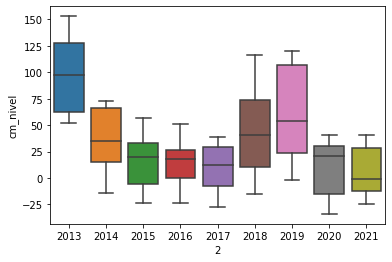

In [9]:
sns.boxplot(x=df['FECHA'].str.split("/", expand=True)[2], y=df['cm_nivel'], data=df)

En el gráfico de bigotes donde comparamos el nivel de la laguna por años, en 2013 los datos tienen otra tendencia. Parece que ese año la laguna tenía un nivel alto de agua.

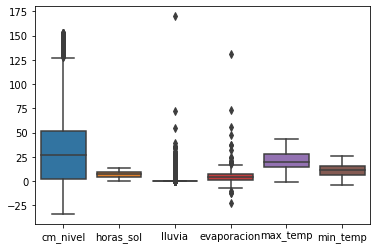

In [16]:
sns.boxplot(data=df)

Si analizamos el mismo diagrama con todas las variables, vemos que esos valores extremos en el nivel en el año 2013 son outliers, aunque quizás sean generados correctamente porque ese año llovió mucho. La variable independiente Evaporación también contiene muchos outliers que pueden añadir ruido.

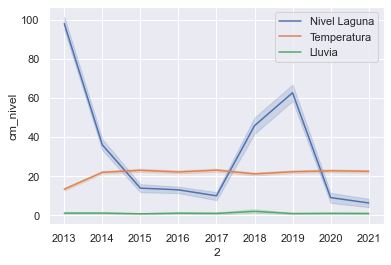

In [17]:
sns.set_theme()
sns.lineplot(x=df['FECHA'].str.split("/", expand=True)[2], y=df['cm_nivel'], label="Nivel Laguna")
sns.lineplot(x=df['FECHA'].str.split("/", expand=True)[2], y=df['max_temp'], label="Temperatura")
sns.lineplot(x=df['FECHA'].str.split("/", expand=True)[2], y=df['lluvia'], label="Lluvia")

Se aprecia que la Laguna tuvo una época buena de agua entre 2012-2013. Sin embargo se mantiene en niveles bajos en los siguientes años, aunque en 2018 hay más lluvias y hace que la laguna vuelva a tener un nivel del agua mayor a 60 cm.

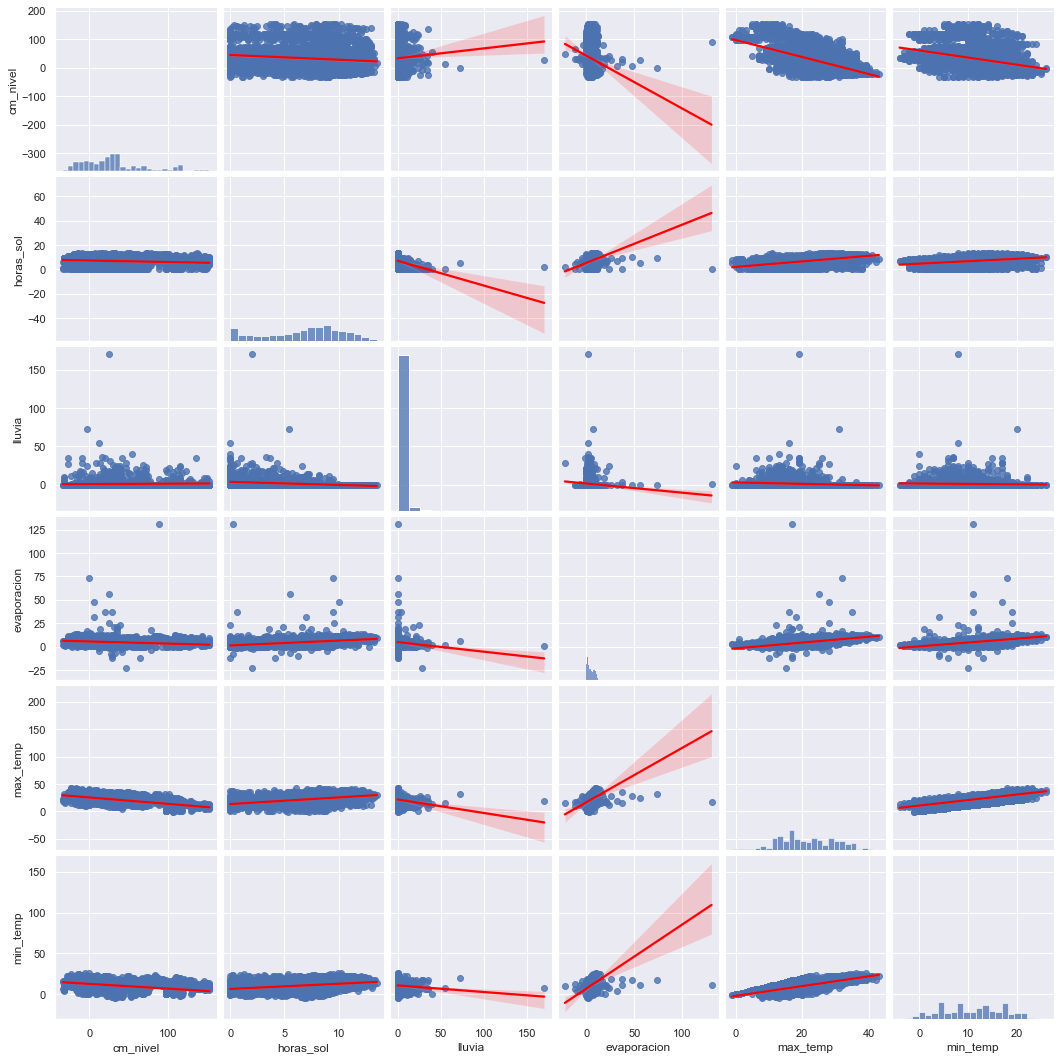

In [18]:
sns.pairplot(data=df, kind="reg", corner=False, plot_kws={'line_kws':{'color':'red'}})

Podemos apreciar que la tendencia de la evaporación aumenta cuando aumenta las temperatura y también cuando aumenta las horas de sol sobre el entorno.

Además cuando llueve, el ambiente es más húmedo y la evaporación es menor. Aprovechando los diagramas, se aprecia que el nivel de la laguna aumenta ligera y suvamente. Esto es así, porque la extensión de la laguna es grande.

### Correlación

La matriz de correlación define las relaciones entre las variables que tiene nuestro dataset. Así sabemos cuáles son las relaciones más positivas para aplicar técnicas de regresión, donde tenemos varias variables independientes, y en base a eso predecimos la variable dependiente, es decir el nivel de la laguna.

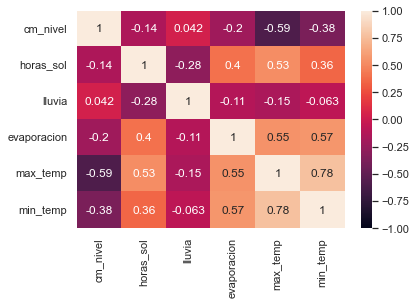

In [25]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Para analizar la correlación que tienen la variables utilizamos un mapa (heat map) que no es más que una matriz con una puntuación que es la correlación. 

Las variables que presentan una correlación positiva mayor son;
- Horas de Sol --- Temperatura máxima = 0.53
- Horas de Sol --- Evaporación = 0.4
- Temperaturas mínima y máxima --- Evaporación = 0.57

La variable objetivo o dependiente tiene una correlación negativa con la mayoría de variables, aunque algo de positiva con la lluvia = 0.04.

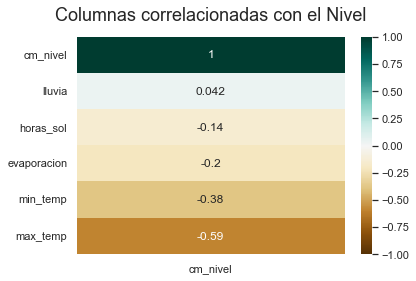

In [26]:
heatmap = sns.heatmap(df.corr()[['cm_nivel']].sort_values(by='cm_nivel', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Columnas correlacionadas con el Nivel', fontdict={'fontsize':18}, pad=16);

# 5. Aplicación de técnica PCA

Vamos a normalizar los datos antes de realizar un PCA, ya que los datos no escalados con diferentes unidades de medición pueden distorsionar la comparación de las características.

In [54]:
# Variables que utilizaremos para hacer predicciones
# Primer modelo contempla todas las variables independientes
#X = df[['horas_sol','lluvia', 'evaporacion', 'max_temp', 'min_temp']]

La variable independiente evaporación, al contener muchos valores outliers induce ruido en los resultados del modelo. Por ello, optamos por eliminarla de nuestro dataset.

In [10]:
X = df[['horas_sol','lluvia', 'max_temp', 'min_temp']]
#Variable objetivo
y = df['cm_nivel']

In [13]:
# Normalizamos los datos
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#Aplicamos PCA para comprobar si el modelo es más preciso con menos dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape
print(X_pca)

[[ 0.74801685 -0.01954535]
 [ 0.62703318  0.03107004]
 [ 0.30246871 -0.40182441]
 ...
 [ 0.17489111 -0.11246201]
 [ 0.06078229 -0.13053779]
 [ 0.08686943 -0.10484138]]


# 6. Algoritmos de ML (Machine Learning)

Para aplicar los algorimo de aprendizaje automático necesitamos dividir el conjunto en conjunto de entramiento y conjunto de test. Además aplicaremos normalización a estos conjuntos para comprobar si dan mejores resultados.

Tenemos:
- Conjunto original sin normalizar (X_train, X_test, y_train, y_test)
- Conjunto aplicado PCA y normalizado (X_train_pca, X_test_pca)
- Conjunto original normalizado (X_train_normalized, X_test_normalized)

In [14]:
# Dividimos dataset en conjunto de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividimos dataset aplicado pca en conjunto de entrenamiento y de test
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print("X_train = ", X_train.shape)
print("X_test = ", X_test.shape)
print("y_train = ", y_train.shape)
print("y_test = ", y_test.shape)

# Normalizamos a la misma escala los conjuntos iniciales
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)

X_test_normalized = scaler.transform(X_test)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X.columns)

print(X_train_normalized)

X_train =  (2629, 4)
X_test =  (658, 4)
y_train =  (2629,)
y_test =  (658,)
      horas_sol    lluvia  max_temp  min_temp
0      0.037037  0.000000  0.295455  0.333333
1      0.518519  0.000000  0.613636  0.566667
2      0.000000  0.000000  0.568182  0.733333
3      0.844444  0.000000  0.431818  0.733333
4      0.585185  0.000000  0.386364  0.266667
...         ...       ...       ...       ...
2624   0.281481  0.045872  0.431818  0.433333
2625   0.022222  0.000000  0.363636  0.333333
2626   0.718519  0.000000  0.704545  0.766667
2627   0.881481  0.000000  0.727273  0.566667
2628   0.718519  0.000000  0.704545  0.733333

[2629 rows x 4 columns]


## 6.1 Regresión Lineal Múltiple

In [22]:
#Regresión lineal multiple

regr = linear_model.LinearRegression()
modelo_regr = regr.fit(X_train, y_train)

# Aplicado PCA
regr2 = linear_model.LinearRegression()
modelo_regr2 = regr2.fit(X_train_pca, y_train_pca)

# Normalizado
regr3 = linear_model.LinearRegression()
modelo_regr3 = regr3.fit(X_train_normalized, y_train)

In [23]:
print("Coeficiente de determinación R^2:", regr.score(X_test, y_test))
print("Coeficiente de determinación R^2 con PCA:", regr2.score(X_test_pca, y_test_pca))
print("Coeficiente de determinación R^2 normalizada:", regr3.score(X_test_normalized, y_test))

Coeficiente de determinación R^2: 0.4629154306857063
Coeficiente de determinación R^2 con PCA: 0.2236289464184963
Coeficiente de determinación R^2 normalizada: 0.4629154306857063


## 6.2 Random Forest

Para encontrar los mejores hiperparámetros para entrenar a nuestro modelo, es decir, hacer tuning, utilizaremos GridSearchCV.

In [186]:
def GridSearchCV_(X_train, y_train, grid, estimator, n_job = -1):
    a = datetime.now()
    c = GridSearchCV(estimator=estimator, param_grid=grid, cv= 5, n_jobs = n_job)
    c.fit(X_train, y_train)
    print("Mejor hiperparametro encontrado:\n")
    print(c.best_params_)
    print("Tiempo de busqueda ", datetime.now() - a)

In [190]:
grid = { 
    'n_estimators': [100,150,300,500,900, 950],
    'max_features': ['auto','sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'min_samples_split': [2, 3, 4, 5, 10, 20, 30],
}

GridSearchCV_(X_train, y_train, grid, RandomForestRegressor(), n_job = -1)
GridSearchCV_(X_train_normalized, y_train, grid, RandomForestRegressor(), n_job = -1)
GridSearchCV_(X_train_pca, y_train_pca, grid, RandomForestRegressor(), n_job = -1)

Mejor hiperparametro encontrado:

{'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 500}
Tiempo de busqueda  0:14:12.483972
Mejor hiperparametro encontrado:

{'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 500}
Tiempo de busqueda  0:13:53.869176
Mejor hiperparametro encontrado:

{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
Tiempo de busqueda  0:15:07.368915


In [24]:
# RandomForest

trees = RandomForestRegressor(max_depth=8, bootstrap=True, min_samples_split=5, n_estimators = 150, max_features = 'auto', random_state = 18)
#Entrentamos el modelo
trees.fit(X_train, y_train)

#Predecimos con el conjunto de test
y_prediccion = trees.predict(X_test)

mse = mean_squared_error(y_test, y_prediccion)

print("Error cuadrado medio = ", mse)
print("Coeficiente de determinación de la predicción = ", r2_score(y_test, y_prediccion))

trees_normalized = RandomForestRegressor(max_depth=7, bootstrap=True, min_samples_split=4, n_estimators = 300, max_features = 'auto', random_state = 18)

#Entrentamos el modelo
trees_normalized.fit(X_train_normalized, y_train)

#Predecimos con el conjunto de test
y_prediccion = trees_normalized.predict(X_test_normalized)

mse = mean_squared_error(y_test, y_prediccion)

print("Error cuadrado medio = ", mse)
print("Coeficiente de determinación de la predicción = ", r2_score(y_test, y_prediccion))

trees_normalized_pca = RandomForestRegressor(max_depth=6, bootstrap=True, min_samples_split=5, n_estimators = 100, max_features = 'auto', random_state = 18)

#Entrentamos el modelo
trees_normalized_pca.fit(X_train_pca, y_train_pca)

#Predecimos con el conjunto de test
y_prediccion_pca = trees_normalized_pca.predict(X_test_pca)

mse = mean_squared_error(y_test_pca, y_prediccion_pca)

print("Error cuadrado medio = ", mse)
print("Coeficiente de determinación de la predicción = ", r2_score(y_test_pca, y_prediccion_pca))

Error cuadrado medio =  685.6474098501034
Coeficiente de determinación de la predicción =  0.6072492112516902
Error cuadrado medio =  690.987403479523
Coeficiente de determinación de la predicción =  0.6041903698125837
Error cuadrado medio =  1332.4752416902322
Coeficiente de determinación de la predicción =  0.23673495350059837


## 6.3 Regresión de Soporte Vectorial

In [194]:
grid = [ {'C': [0.1, 0.01, 0.5, 1, 10, 15, 19, 21, 23], 
              'gamma': [0.001, 0.01, 0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'epsilon': [0.1, 0.3, 0.5, 1, 10, 15, 30]} ]

GridSearchCV_(X_train, y_train, grid, SVR(), n_job = -1)
GridSearchCV_(X_train_normalized, y_train, grid, SVR(), n_job = -1)
GridSearchCV_(X_train_pca, y_train_pca, grid, SVR(), n_job = -1)

Mejor hiperparametro encontrado:

{'C': 23, 'epsilon': 15, 'gamma': 0.01, 'kernel': 'rbf'}
Tiempo de busqueda  0:07:22.583669
Mejor hiperparametro encontrado:

{'C': 23, 'epsilon': 15, 'gamma': 10, 'kernel': 'rbf'}
Tiempo de busqueda  0:02:01.492000
Mejor hiperparametro encontrado:

{'C': 23, 'epsilon': 15, 'gamma': 10, 'kernel': 'rbf'}
Tiempo de busqueda  0:01:58.908001


In [15]:
modelSVR = SVR(kernel='rbf', C=23, epsilon=15, gamma = 0.01)
modelSVR.fit(X_train, y_train)
print("Coeficiente de determinación = ", modelSVR.score(X_test,y_test))

modelSVR = SVR(kernel='rbf', C=23, epsilon=15, gamma = 10)
modelSVR.fit(X_train_normalized, y_train)
print("Coeficiente de determinación = ", modelSVR.score(X_test_normalized,y_test))

modelSVR = SVR(kernel='rbf', C=23, epsilon=15, gamma = 10)
modelSVR.fit(X_train_pca, y_train_pca)
print("Coeficiente de determinación = ", modelSVR.score(X_test_pca,y_test_pca))

Coeficiente de determinación =  0.5779174464325274
Coeficiente de determinación =  0.5711979389586237
Coeficiente de determinación =  0.2194114592213493


## 6.4 Multivariate Adaptive Regression

In [203]:
grid = [ {'max_degree': [10, 15, 20, 25, 30, 35, 50, 100, 140],
         'max_terms': [100, 150, 200, 250, 300, 350, 500, 1000]} ]

GridSearchCV_(X_train, y_train, grid, Earth(), n_job = -1)
GridSearchCV_(X_train_normalized, y_train, grid, Earth(), n_job = -1)
GridSearchCV_(X_train_pca, y_train_pca, grid, Earth(), n_job = -1)

C:\Users\Michael\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Michael\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Mejor hiperparametro encontrado:

{'max_degree': 10, 'max_terms': 100}
Tiempo de busqueda  0:01:33.051456


C:\Users\Michael\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Michael\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Mejor hiperparametro encontrado:

{'max_degree': 10, 'max_terms': 100}
Tiempo de busqueda  0:03:05.773456


C:\Users\Michael\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


Mejor hiperparametro encontrado:

{'max_degree': 10, 'max_terms': 100}
Tiempo de busqueda  0:02:26.529917


C:\Users\Michael\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [197]:
modelE = Earth(max_terms=100, max_degree=10)
MARS = modelE.fit(X_train, y_train)
print(MARS.summary())

modelE = Earth(max_terms=100, max_degree=10)
MARS = modelE.fit(X_train_normalized, y_train)
print(MARS.summary())

modelE = Earth(max_terms=100, max_degree=10)
MARS = modelE.fit(X_train_pca, y_train_pca)
print(MARS.summary())

C:\Users\Michael\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Michael\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth Model
-------------------------------------------------------------------
Basis Function                               Pruned  Coefficient   
-------------------------------------------------------------------
(Intercept)                                  No      94.6937       
max_temp                                     No      -9.91353      
horas_sol                                    Yes     None          
min_temp                                     No      14.7219       
horas_sol*horas_sol                          No      -0.460074     
min_temp*horas_sol*horas_sol                 Yes     None          
max_temp*max_temp                            No      0.461299      
min_temp*max_temp                            No      -1.2988       
min_temp*min_temp*max_temp                   No      0.0261089     
max_temp*min_temp*horas_sol*horas_sol        No      -0.00121932   
horas_sol*horas_sol*horas_sol                No      0.0869873     
min_temp*horas_sol                  

C:\Users\Michael\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Michael\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
C:\Users\Michael\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To us

Earth Model
-------------------------------------------------------------------
Basis Function                                Pruned  Coefficient  
-------------------------------------------------------------------
(Intercept)                                   No      59.0596      
max_temp                                      No      -322.338     
horas_sol                                     Yes     None         
min_temp                                      Yes     None         
horas_sol*horas_sol                           No      -351.671     
min_temp*horas_sol*horas_sol                  No      -566.89      
max_temp*max_temp                             No      2525.39      
min_temp*max_temp                             No      4406.27      
min_temp*min_temp*max_temp                    No      -8095.58     
max_temp*min_temp*horas_sol*horas_sol         No      252.744      
horas_sol*horas_sol*horas_sol                 No      807.633      
min_temp*horas_sol                  

C:\Users\Michael\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


## 6.5 KNN Regression

In [198]:
grid = [ {'n_neighbors': [10, 15, 20, 25, 30, 35, 50, 100, 140]} ]

GridSearchCV_(X_train, y_train, grid, KNeighborsRegressor(), n_job = -1)
GridSearchCV_(X_train_normalized, y_train, grid, KNeighborsRegressor(), n_job = -1)
GridSearchCV_(X_train_pca, y_train_pca, grid, KNeighborsRegressor(), n_job = -1)

Mejor hiperparametro encontrado:

{'n_neighbors': 20}
Tiempo de busqueda  0:00:03.180998
Mejor hiperparametro encontrado:

{'n_neighbors': 10}
Tiempo de busqueda  0:00:00.257999
Mejor hiperparametro encontrado:

{'n_neighbors': 50}
Tiempo de busqueda  0:00:00.132000


In [16]:
neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X_train, y_train)
print("Coeficiente de determinación = ", neigh.score(X_test, y_test))

neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train_normalized, y_train)
print("Coeficiente de determinación = ", neigh.score(X_test_normalized, y_test))

neigh = KNeighborsRegressor(n_neighbors=50)
neigh.fit(X_train_pca, y_train_pca)
print("Coeficiente de determinación = ", neigh.score(X_test_pca, y_test_pca))

Coeficiente de determinación =  0.5826898532465026
Coeficiente de determinación =  0.5530178282827392
Coeficiente de determinación =  0.25189186605231906


## 6.6 Redes Neuronales Artificiales ANN

In [15]:
# Red Neuronal Artificial
modelann = Sequential()

# Primera capa
modelann.add(Dense(4, activation = 'relu', input_dim = 4))

# Segunda capa oculta
modelann.add(Dense(units = 64, activation = 'relu', kernel_initializer="random_normal", bias_initializer="zeros"))

# Tercera capa oculta
modelann.add(Dense(units = 32, activation = 'relu', kernel_initializer="random_normal", bias_initializer="zeros"))

# Capa de salida
modelann.add(Dense(units = 1, activation = 'relu'))

# Compilación
modelann.compile(optimizer = Adam(learning_rate=0.01),loss = 'mean_squared_error', metrics=['accuracy'])
modelann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 64)                320       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,453
Trainable params: 2,453
Non-trainable params: 0
_________________________________________________________________


In [16]:
history_normalized = modelann.fit(X_train_normalized, y_train, batch_size = X.shape[0], epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 1s 745ms/step - loss: 2724.4558 - accuracy: 0.0072
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 2720.4526 - accuracy: 0.0072
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 2714.5378 - accuracy: 0.0072
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 2706.1714 - accuracy: 0.0072
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 2694.6482 - accuracy: 0.0065
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 2679.3232 - accuracy: 0.0038
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 2659.4868 - accuracy: 0.0038
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 2634.4146 - accuracy: 0.0038
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 2603.4211 - accuracy: 0.0038
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 2565.8557 - acc

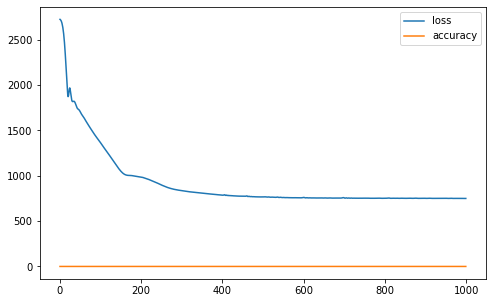

In [17]:
y_pred_ann = modelann.predict(X_test_normalized)

h = pd.DataFrame(history_normalized.history)
h.plot(figsize=(8,5))
plt.show()

### Conclusiones

- Evaporación es una variable interesante inicialmente, aunque hemos comprobado que si no la utilizamos en nuestro conjunto de datos mejoramos el modelo.
- Las red neuronal artificial es la que peor resultado da, es normal, dada la volumetría de los datos, necesitaría mucho más datos para obtener una puntuación alta.
- El algoritmo de regresión que mejor resultado ha obtenido es Random Forest Regressor con una precisión del 60%.
- Las variables lluvia y horas_sol son las que más correlación tienen con el nivel de la laguna.